In [1]:
# Importing required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt

import hvplot.pandas

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Displaying sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
df_market_data.shape

(41, 7)

In [4]:
# Generating summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plotting the data to see the DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Using the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Instantiating the StandardScaler
scaler = StandardScaler()

# Applying fit_transform to normalize the data
# Copying the crypto names from the original data
# Setting the 'coin_id' column as index
df_market_data_scaled = pd.DataFrame(scaler.fit_transform(df_market_data), columns=df_market_data.columns, index=df_market_data.index)

# Display sample data after scaling
print("\nSample data after scaling:")
df_market_data_scaled.head(10)


Sample data after scaling:


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Creating a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Displaying the list
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [8]:
# Creating an empty list to store the inertia values
inertia_values = []

# Creating a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Creating a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    
    # Fitting the model to the data using `df_market_data_scaled`
    kmeans_model.fit(df_market_data_scaled)
    
    # Appending the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

In [9]:
# Creating a dictionary with the data to plot the Elbow curve
elbow_data = {'K': k_values, 'Inertia': inertia_values}

# Creating a DataFrame with the data to plot the Elbow curve
elbow_org_df = pd.DataFrame(elbow_data)


Data for Elbow Curve:
     K     Inertia
0    1  287.000000
1    2  212.123342
2    3  170.193571
3    4   79.022435
4    5   71.097914
5    6   66.108827
6    7   54.488123
7    8   43.224693
8    9   32.860884
9   10   28.404885
10  11   24.116198


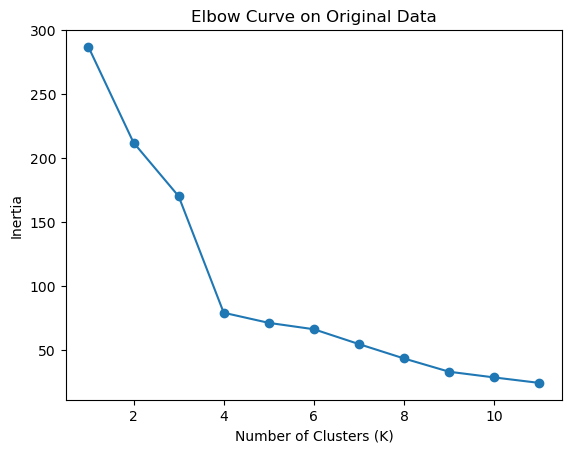

In [10]:
# Plotting a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Displaying the DataFrame
print("\nData for Elbow Curve:")
print(elbow_org_df)

# Plotting the Elbow curve
plt.plot(elbow_org_df['K'], elbow_org_df['Inertia'], marker='o')
plt.title('Elbow Curve on Original Data')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [11]:
# Plotting a line chart for the Elbow curve using hvplot
elbow_org_plt = elbow_org_df.hvplot.line(x='K', y='Inertia', line_dash='dashed', title='Elbow Curve on PCA Data', xlabel='Number of Clusters (K)', ylabel='Inertia', color='orange')

elbow_org_plt

:Curve   [K]   (Inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:  k = 4 seems to be the best value for 'k', based on the plot above. It can be observed that for values of k > 4, the values of Inertia show gradual changes and therefore k =4 seems to be the best fit.**

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [12]:
# Initializing the K-Means model using the best value for k
# Best value for k was determined to be 4 based on above plot
kmeans_model = KMeans(n_clusters=4, random_state=42)

In [13]:
# Fitting the model to the scaled data
kmeans_model.fit(df_market_data_scaled)

KMeans(n_clusters=4, random_state=42)

In [14]:
# Predicting the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.predict(df_market_data_scaled)


In [15]:
# Printing the resulting array of cluster values.
print("Cluster labels for each data point:")
print(cluster_labels)

Cluster labels for each data point:
[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [16]:
# Creating a copy of the DataFrame
df_market_data_scaled_copy = df_market_data_scaled.copy()

In [17]:
# Adding a new column to the DataFrame with the predicted clusters
df_market_data_scaled_copy['Cluster_labels_orgdata'] = cluster_labels

# Displaying sample data with the predicted clusters
print("Sample data with predicted clusters:")
df_market_data_scaled_copy.head()

Sample data with predicted clusters:


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster_labels_orgdata
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [18]:
# Creating a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Coloring the graph points with the labels found using K-Means and 
# adding the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = df_market_data_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster_labels_orgdata",  # Color the graph points with the predicted clusters
    hover_cols=["coin_id"],  # Add the crypto name in the hover parameter
    title="Scatter Plot with K-Means Clusters on Original Scaled Data",
    xlabel="Price Change Percentage (24h)",
    ylabel="Price Change Percentage (7d)"
)

# Show the plot
scatter_plot

:NdOverlay   [Cluster_labels_orgdata]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [19]:
# Creating a PCA model instance with n_components=3
pca_model = PCA(n_components=3)

In [20]:
# Using the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_result = pca_model.fit_transform(df_market_data_scaled)

# Viewing the first five rows of the DataFrame. 
df_pca_result = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
print("\nTransformed Data using PCA:")
df_pca_result.head()


Transformed Data using PCA:


,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [21]:
# Retrieving the explained variance ratio for each principal component
explained_variance_ratio = pca_model.explained_variance_ratio_

# Displaying the explained variance ratio for each principal component
print("Explained Variance Ratio for each Principal Component:")
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"PC{i}: {ratio:.4f}")

Explained Variance Ratio for each Principal Component:
PC1: 0.3720
PC2: 0.3470
PC3: 0.1760


In [22]:
# Calculating the total explained variance
total_explained_variance = sum(explained_variance_ratio)

# Displaying the total explained variance
print(f"Total Explained Variance of the Three Principal Components: {total_explained_variance:.4f}")

Total Explained Variance of the Three Principal Components: 0.8950


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained Variance of the Three Principal Components is **0.8950** 

In [23]:
# Creating a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data
# df_pca_result was created above
df_pca_result.head()

# Copying the crypto names from the original data
df_pca_result['coin_id'] = df_market_data.index

# Setting the coinid column as index
df_pca_result.index = df_pca_result['coin_id']

# Removing the 'coin_id' column after adding it as an index to the dataframe
df_pca_result.drop(columns='coin_id', errors='ignore', inplace=True)

# Displaying sample data
df_pca_result.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [24]:
# Creating a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Displaying the list
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [25]:
# Creating an empty list to store the inertia values
inertia_values = []

# Creating a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Creating a KMeans model using the loop counter for the n_clusters
    kmeans_pca_model = KMeans(n_clusters=k, random_state=42)
    
    # Fitting the model to the data using `df_pca_result_with_names`
    kmeans_pca_model.fit(df_pca_result)
    
    # Appending the model.inertia_ to the inertia list
    inertia_values.append(kmeans_pca_model.inertia_)

In [26]:
# Creating a dictionary with the data to plot the Elbow curve
elbow_pca_data = {'K': k_values, 'Inertia': inertia_values}

# Creating a DataFrame with the data to plot the Elbow curve
elbow_pca_df = pd.DataFrame(elbow_pca_data)

# Displaying the DataFrame with the data for the Elbow curve
print("\nData for Elbow Curve:")
elbow_pca_df


Data for Elbow Curve:


,K,Inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901
5,6,31.749005
6,7,28.031869
7,8,19.451747
8,9,13.814082
9,10,10.630648


In [27]:
elbow_pca_plt = elbow_pca_df.hvplot.line(x='K', y='Inertia', line_dash='dotdash', title='Elbow Curve on PCA Data', xlabel='Number of Clusters (K)', ylabel='Inertia',color='green')

elbow_pca_plt

:Curve   [K]   (Inertia)

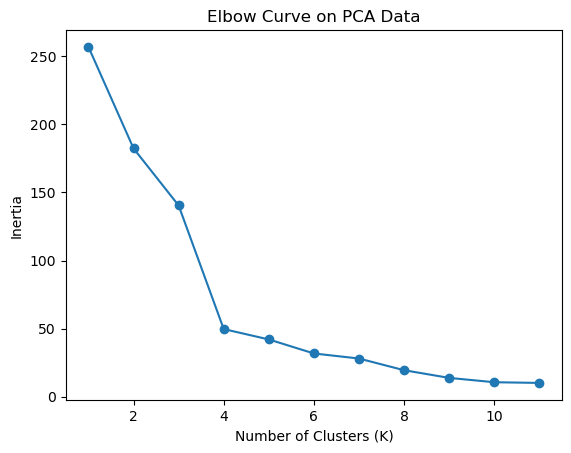

In [28]:
# Plotting a line chart for the Elbow curve
plt.plot(elbow_pca_df['K'], elbow_pca_df['Inertia'], marker='o')
plt.title('Elbow Curve on PCA Data')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer: k = 4**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:No, they're the same values.** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [29]:
# Using the best_k value determined from the Elbow curve analysis
best_k = 4

# Initializing the K-Means model with the best value for k
kmeans_model_best_k = KMeans(n_clusters=best_k, random_state=42)

In [30]:
# Fitting the model to the PCA data
kmeans_model_best_k.fit(df_pca_result)

KMeans(n_clusters=4, random_state=42)

In [31]:
# Getting the cluster labels for each data point
cluster_labels_best_k = kmeans_model_best_k.predict(df_pca_result)

# Printing the resulting array of cluster values.
cluster_labels_best_k

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2])

In [32]:
# Creating a copy of the DataFrame with the PCA data
df_pca_result_with_clusters = df_pca_result.copy()

# Adding a new column to the DataFrame with the predicted clusters
df_pca_result_with_clusters['Cluster_labels_PCAdata'] = cluster_labels_best_k

# Displaying the DataFrame with cluster labels
print("Data with Cluster Labels:")
df_pca_result_with_clusters.head()

Data with Cluster Labels:


,PC1,PC2,PC3,Cluster_labels_PCAdata
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [33]:
# Creating a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Coloring the graph points with the labels found using K-Means and 
# adding the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot_PCA = df_pca_result_with_clusters.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Cluster_labels_PCAdata",  # Color the graph points with the predicted clusters
    hover_cols=["coin_id"],  # Add the crypto name in the hover parameter
    title="Scatter Plot with K-Means Clusters using PCA Data",
    xlabel="PC1",
    ylabel="PC2"
)

# Show the plot
scatter_plot_PCA

:NdOverlay   [Cluster_labels_PCAdata]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [34]:
# Composite plot to contrast the Elbow curves
elbow_org_plt * elbow_pca_plt

:Overlay
   .Curve.I  :Curve   [K]   (Inertia)
   .Curve.II :Curve   [K]   (Inertia)

In [35]:
# Plots juxtaposed to compare the Elbow curves
elb_plots_cluster = (elbow_org_plt + elbow_pca_plt).cols(1)
elb_plots_cluster

:Layout
   .Curve.I  :Curve   [K]   (Inertia)
   .Curve.II :Curve   [K]   (Inertia)

In [36]:
# Composite plot to contrast the clusters
scatter_plot * scatter_plot_PCA

:Overlay
   .NdOverlay.I  :NdOverlay   [Cluster_labels_orgdata]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Cluster_labels_PCAdata]
      :Scatter   [PC1]   (PC2,coin_id)

In [37]:
# Plots juxtaposed to compare the clusters
plots_cluster = (scatter_plot + scatter_plot_PCA).cols(1)
plots_cluster

:Layout
   .NdOverlay.I  :NdOverlay   [Cluster_labels_orgdata]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Cluster_labels_PCAdata]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:After visually comapring both cluster maps, it can be confirmed that those clusters labeled 1 & 3 are definite outliers. It can also be inferred that by using fewer features to cluster the data using K-Means, both the clusters appear to be better formed, grouped in a tighter formation.** 